# Previsão de renda
### Etapa 1 CRISP - DM: Entendimento do negócio


Este plano visa desenvolver um modelo de regressão com a finalidade de estimar a renda dos clientes. Utilizar-se-á um modelo de Regressão Linear, elaborado por meio do statsmodels. Para o treinamento do algoritmo, será empregado um conjunto de dados históricos provenientes do arquivo denominado "previsao-renda.csv".

### Etapa 2 Crisp-DM: Entendimento dos dados

O conjunto de dados apresentado inclui 14 variáveis, além da variável-alvo destacada, 'renda', que está em negrito na tabela. Cada variável tem seu significado detalhado em uma tabela anexa.

A disposição dos dados se dá em um formato tabular, com cada linha representando um cliente e cada coluna correspondendo a uma variável que descreve as características desses clientes.

As explicações detalhadas dessas variáveis estão disponíveis em um dicionário de dados, localizado logo abaixo da tabela.

## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER AQUI</span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de Referencia                                     | DateTime|
| id_cliente              |  ID Cliente                                     |Inteiro|
| sexo                    |   M = 'Masculino'; F = 'Feminino'                                     | Binário|
| posse_de_veiculo        |  Y = 'possui'; N = 'não possui'                                     | Binário|
| posse_de_imovel         |  Y = 'possui'; N = 'não possui'                                      | Binário|
| qtd_filhos              |  Quantidade de filhos                                      | Inteiro|
| tipo_renda              |  Tipo de renda (ex: assaláriado, autônomo, etc.)                                     | Texto|
| educacao                |  Nível de educação (ex: secundário, superior etc.)	                                     | Texto|
| estado_civil            |  Estado civil (ex: solteiro, casado, etc.)                                     | Texto|
| tipo_residencia         |  Tipo de residência (ex: casa/apartamento, etc.)                                      | Texto|
| idade                   |  Idade em anos                                      | Inteiro|
| tempo_emprego           |  Tempo de emprego em anos                                      | Inteiro|
| qt_pessoas_residencia   | Quantidade de pessoas na residência                                      | Inteiro|
| renda                   |  Renda mensal                                      | Decimal|



### Carregando pacotes

In [ ]:
!pip install pandas-profiling

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as stm
import patsy
import os

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Carregando dados

In [7]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [8]:
# Tirar variaveis que não serão utilizadas
df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(f"Número de linhas/colunas = {df.shape}")

df.head()

Número de linhas/colunas = (15000, 14)


,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [9]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
prof.to_file('renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Entendimento dos dados - Bivariadas

Ao examinar a conexão entre as variáveis binárias e a variável de resposta 'renda', observa-se que a variável 'sexo' parece exibir uma diferença considerável na renda entre suas duas categorias distintas.

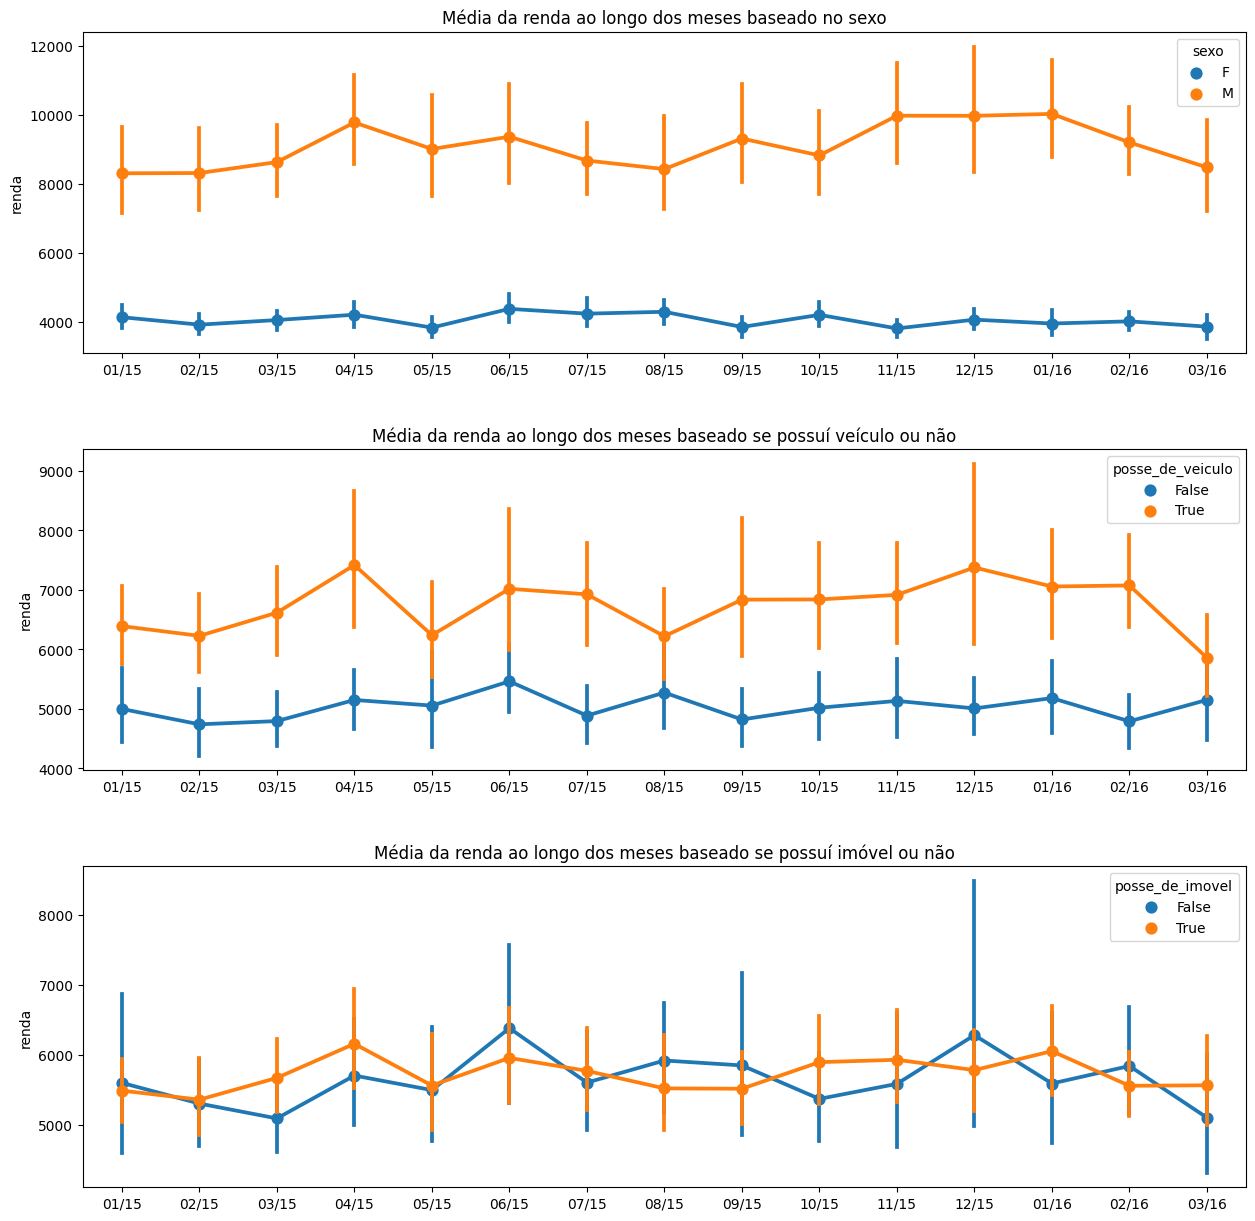

In [12]:
figura, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,15))

sns.pointplot(data = df, x = 'data_ref', y = 'renda', hue = 'sexo', ax = ax1)
sns.pointplot(data = df, x = 'data_ref', y = 'renda', hue = 'posse_de_veiculo', ax = ax2)
sns.pointplot(data = df, x = 'data_ref', y = 'renda', hue = 'posse_de_imovel', ax = ax3)

valores_x = pd.to_datetime(df['data_ref']).dt.strftime("%m/%y").unique()

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")

ax1.set_title("Média da renda ao longo dos meses baseado no sexo")
ax2.set_title("Média da renda ao longo dos meses baseado se possuí veículo ou não")
ax3.set_title("Média da renda ao longo dos meses baseado se possuí imóvel ou não")

ax1.set_xticklabels(valores_x)
ax2.set_xticklabels(valores_x)
ax3.set_xticklabels(valores_x)

figura.subplots_adjust(hspace=0.3)

plt.show()

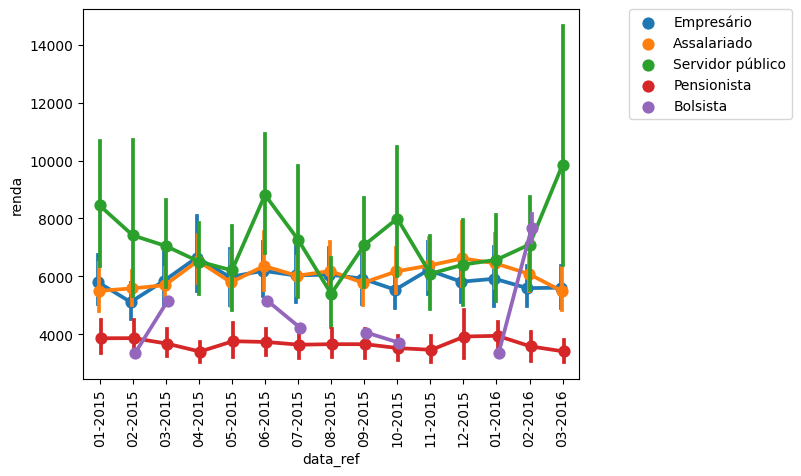

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Certifique-se de que 'data_ref' está no formato datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

ax = sns.pointplot(
    data=df,
    x='data_ref',
    y='renda',
    hue='tipo_renda',
    dodge=True,
    errorbar=('ci', 95)  # Modificado aqui
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.10), ncol=3)
tick_labs = df['data_ref'].dt.strftime('%m-%Y').unique()  # Modificado aqui
ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)


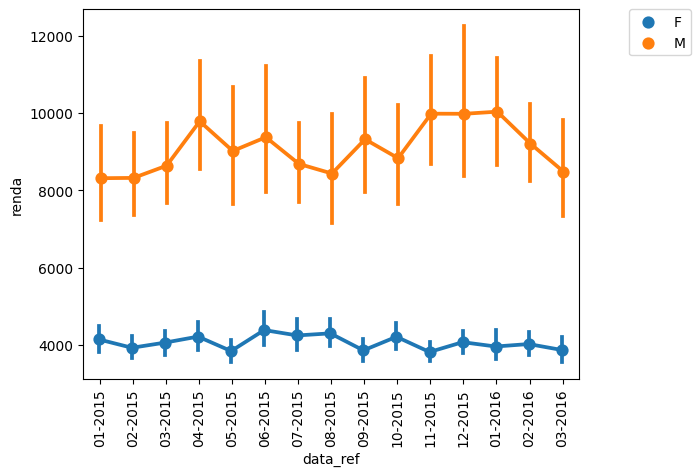

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Converter 'data_ref' para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Corrigindo a chamada para sns.pointplot
ax = sns.pointplot(
    data=df,
    x='data_ref',
    y='renda',
    hue='sexo',
    dodge=True,
    errorbar=('ci', 95)  # Modificado aqui
)

# Configuração de legenda e etiquetas
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.10), ncol=3)
tick_labs = df['data_ref'].dt.strftime('%m-%Y').unique()  # Modificado para usar dt
ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)


### Renda em Relação às Variáveis Numéricas
Ao examinar as variáveis numéricas, é possível investigar a correlação existente entre elas.

Entre essas variáveis, o tempo de emprego se destaca como sendo particularmente relevante para a interpretação da renda, apresentando uma correlação de 39%.

É importante destacar também que existe uma correlação significativa entre o número de pessoas na residência e a quantidade de filhos, o que era esperado. Contudo, isso pode levar a questões de multicolinearidade.

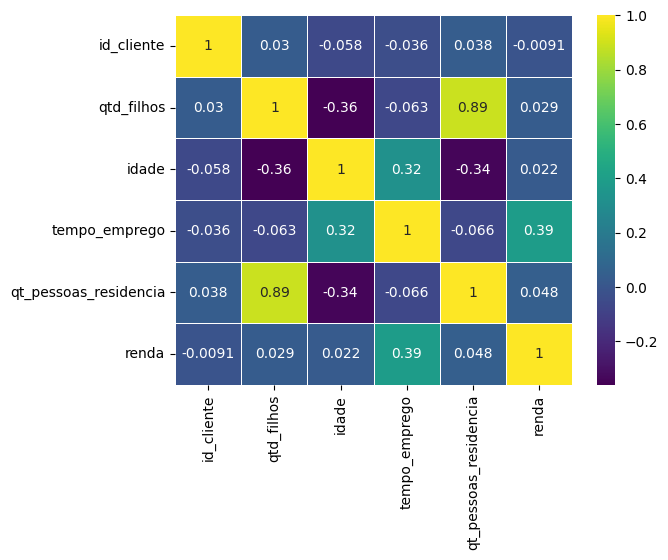

In [24]:
# Selecionando apenas dados numéricos e calculando a correlação
corr_matrix = df.select_dtypes('number').corr()

# Criando um gráfico de calor com a nova paleta de cores e linhas divisoras
ax = sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=.5)

# Exibindo o gráfico
plt.show()


### Renda e Variáveis Categóricas
Inicialmente, não se observam diferenças significativas na renda com base nas variáveis categóricas examinadas. Contudo, ainda é necessário avaliar o p-value ao desenvolver o modelo para uma análise mais precisa.

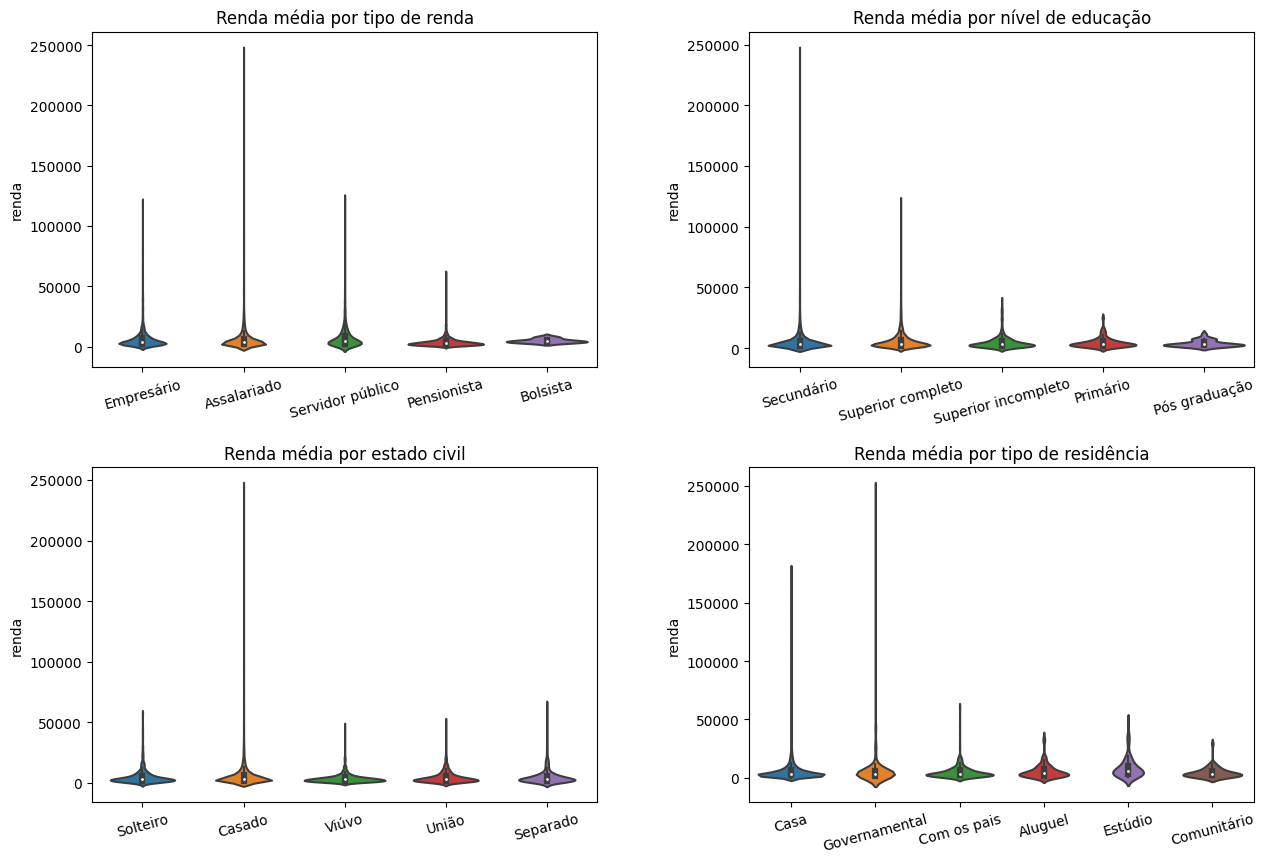

In [27]:
figura, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

sns.violinplot(data=df, x='tipo_renda', y='renda', errorbar=('ci', 95), ax=ax1)
sns.violinplot(data=df, x='educacao', y='renda', errorbar=('ci', 95), ax=ax2)
sns.violinplot(data=df, x='estado_civil', y='renda', errorbar=('ci', 95), ax=ax3)
sns.violinplot(data=df, x='tipo_residencia', y='renda', ax=ax4)

# Ajustando rotações e configurações dos rótulos do eixo X
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=15)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=15)

# Removendo rótulos do eixo X
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")

# Definindo títulos para cada subplot
ax1.set_title("Renda média por tipo de renda")
ax2.set_title("Renda média por nível de educação")
ax3.set_title("Renda média por estado civil")
ax4.set_title("Renda média por tipo de residência")

# Ajustando o espaço entre os gráficos
figura.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()



### Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

seleção: Já temos os dados selecionados adequadamente?

limpeza: Precisaremos identificar e tratar dados faltantes

construção: construção de novas variáveis

integração: Temos apenas uma fonte de dados, não é necessário integração

formatação: Os dados já se encontram em formatos úteis?

### Limpeza de dados

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   id_cliente             15000 non-null  int64         
 2   sexo                   15000 non-null  object        
 3   posse_de_veiculo       15000 non-null  bool          
 4   posse_de_imovel        15000 non-null  bool          
 5   qtd_filhos             15000 non-null  int64         
 6   tipo_renda             15000 non-null  object        
 7   educacao               15000 non-null  object        
 8   estado_civil           15000 non-null  object        
 9   tipo_residencia        15000 non-null  object        
 10  idade                  15000 non-null  int64         
 11  tempo_emprego          12427 non-null  float64       
 12  qt_pessoas_residencia  15000 non-null  float64       
 13  r

In [30]:
df = df.drop(['data_ref', 'id_cliente', 'tempo_emprego'], axis=1)

In [32]:
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   qt_pessoas_residencia  15000 non-null  float64
 10  renda                  15000 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 1.1+ MB


Tratando duplicadas

In [35]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(df.shape)
print(df.shape)
print(df.info())

(10447, 11)
(10447, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   10447 non-null  object 
 1   posse_de_veiculo       10447 non-null  bool   
 2   posse_de_imovel        10447 non-null  bool   
 3   qtd_filhos             10447 non-null  int64  
 4   tipo_renda             10447 non-null  object 
 5   educacao               10447 non-null  object 
 6   estado_civil           10447 non-null  object 
 7   tipo_residencia        10447 non-null  object 
 8   idade                  10447 non-null  int64  
 9   qt_pessoas_residencia  10447 non-null  float64
 10  renda                  10447 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 755.1+ KB
None


### Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo.

Os passos típicos são:

Selecionar a técnica de modelagem

Desenho do teste

Avaliação do modelo

### Transformação d\as variáveis em dummies, e rodando modelo

In [36]:
df = pd.get_dummies(df, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'],
                      drop_first= True).copy()
df.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                             uint8
tipo_renda_Bolsista                uint8
tipo_renda_Empresário              uint8
tipo_renda_Pensionista             uint8
tipo_renda_Servidor público        uint8
educacao_Pós graduação             uint8
educacao_Secundário                uint8
educacao_Superior completo         uint8
educacao_Superior incompleto       uint8
estado_civil_Separado              uint8
estado_civil_Solteiro              uint8
estado_civil_União                 uint8
estado_civil_Viúvo                 uint8
tipo_residencia_Casa               uint8
tipo_residencia_Com os pais        uint8
tipo_residencia_Comunitário        uint8
tipo_residencia_Estúdio            uint8
tipo_residencia_Governamental      uint8
dtype: object

In [37]:
X = df.drop(['renda'], axis=1).copy()
y = df['renda']

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               10447 non-null  bool   
 1   posse_de_imovel                10447 non-null  bool   
 2   qtd_filhos                     10447 non-null  int64  
 3   idade                          10447 non-null  int64  
 4   qt_pessoas_residencia          10447 non-null  float64
 5   sexo_M                         10447 non-null  uint8  
 6   tipo_renda_Bolsista            10447 non-null  uint8  
 7   tipo_renda_Empresário          10447 non-null  uint8  
 8   tipo_renda_Pensionista         10447 non-null  uint8  
 9   tipo_renda_Servidor público    10447 non-null  uint8  
 10  educacao_Pós graduação         10447 non-null  uint8  
 11  educacao_Secundário            10447 non-null  uint8  
 12  educacao_Superior completo     10447 non-null 

In [39]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10447 entries, 0 to 10446
Series name: renda
Non-Null Count  Dtype  
--------------  -----  
10447 non-null  float64
dtypes: float64(1)
memory usage: 81.7 KB


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= True)

In [41]:
reg1 = DecisionTreeRegressor(max_depth=4)
reg2 = DecisionTreeRegressor(max_depth=8)

reg1.fit(X_test, y_test)
reg2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [42]:
mse1 = reg1.score(X_test, y_test)
mse2 = reg2.score(X_test, y_test)

template = 'O R-quadrado da árvore com profundidade {0} é: {1:.2f}'

print(template.format(reg1.get_depth(),mse1).replace('.',','))
print(template.format(reg2.get_depth(),mse2).replace('.',','))

O R-quadrado da árvore com profundidade 4 é: 0,14
O R-quadrado da árvore com profundidade 8 é: 0,36


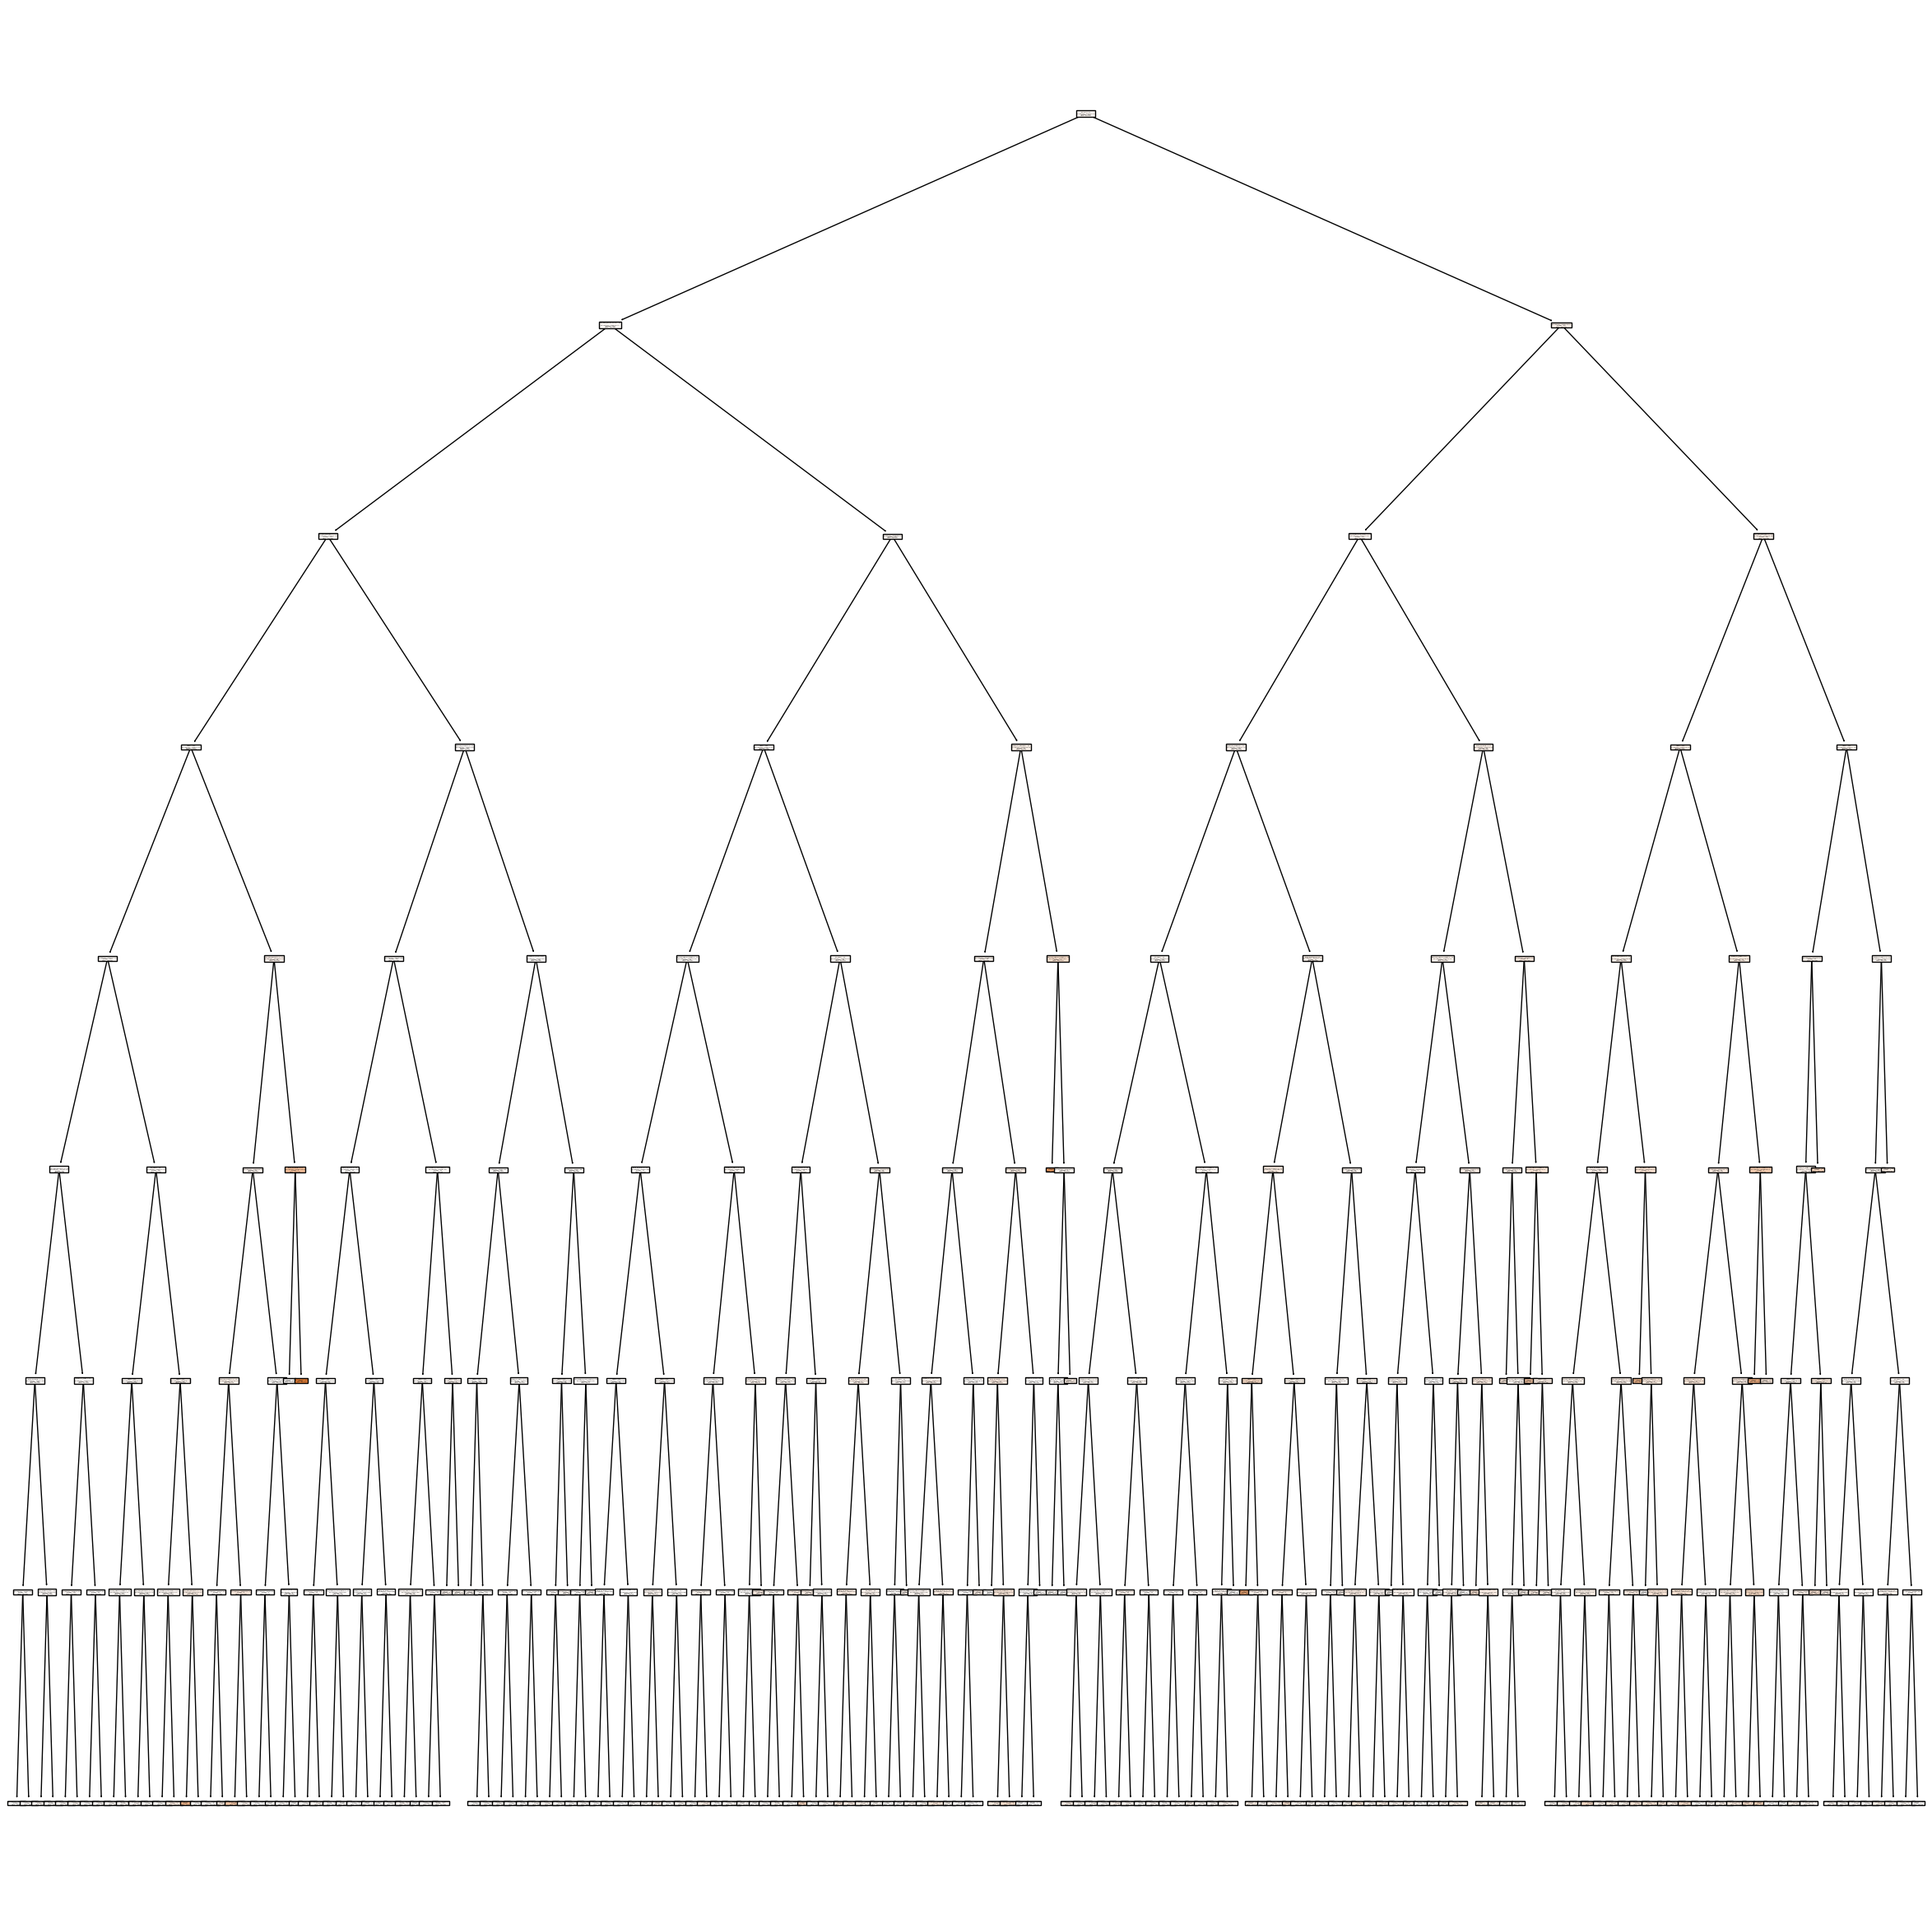

In [45]:
plt.rc('figure', figsize=(30, 30))
tp = tree.plot_tree(reg2,
                   feature_names=X_test.columns,
                   filled=True)

In [46]:
#pré poda

reg2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
reg2.fit(X_train, y_train)
mse1 = reg2.score(X_test, y_test)
mse1

0.08062727579141071

<Axes: xlabel='n_minimo', ylabel='profundidade'>

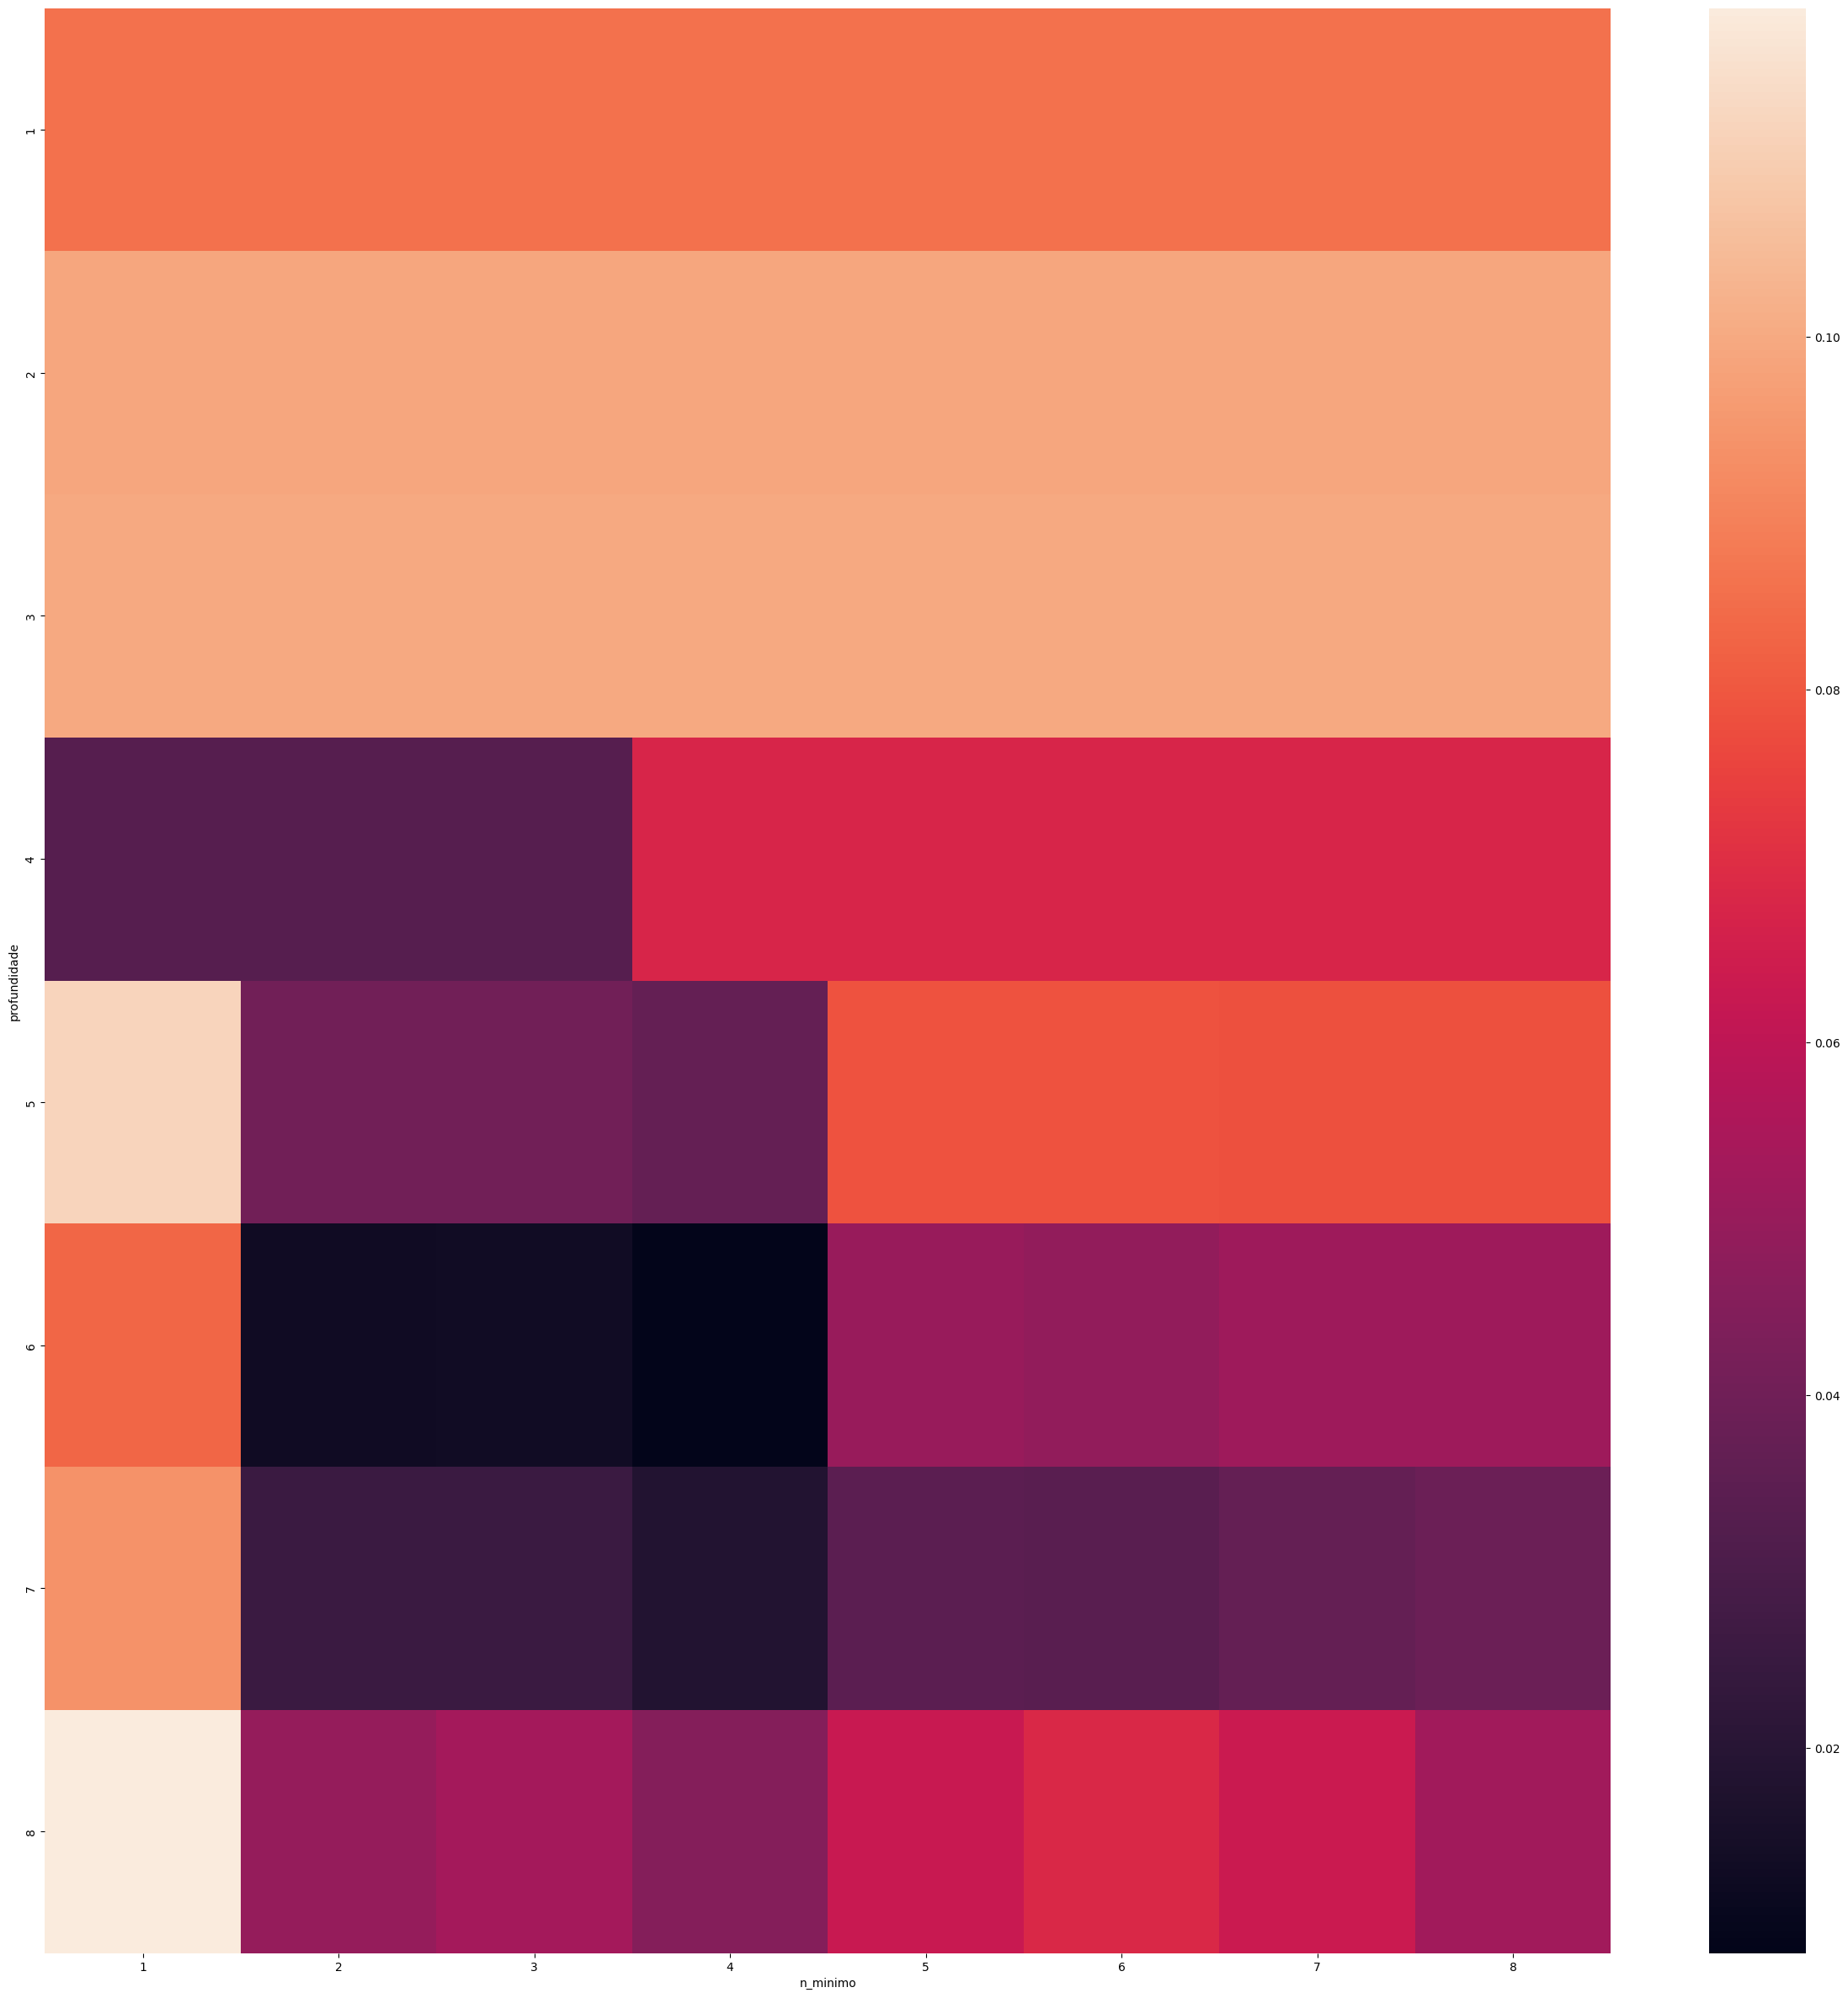

In [47]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(1, 9):
        reg2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg2.fit(X_train, y_train)
        mse1 = reg2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'))

### Etapa 5 Crisp-DM: Avaliação dos resultados

In [48]:
print(f'R-quadrado de treino é: {reg2.score(X_train, y_train)*100:.2f}%')

R-quadrado de treino é: 23.59%


In [49]:
print(f'R-quadrado de teste é: {reg2.score(X_test, y_test)*100:.2f}%')

R-quadrado de teste é: 5.26%


### Etapa 6 Crisp-DM: Implantação


Nesta fase, aplicamos o modelo criado, geralmente integrando-o a um sistema que realiza decisões de forma automatizada.

Para este projeto, criaremos um script separado na pasta do projeto, que constituirá uma página no Streamlit.